<a href="https://colab.research.google.com/github/DikheetaNath/ML-Projects/blob/main/Stock_Market_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing And Preparing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import date,timedelta
import pandas_datareader as pdr
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d") # STRingFormatTIME
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

In [ ]:
# list of stock tickers to download
tickers = ['RELIANCE.NS','TCS.NS','INFY.NS','WIPRO.NS']

In [ ]:
data = yf.download(tickers, start=start_date, end=end_date, progress=False)

In [ ]:
data.head()

Price         Adj Close                                              Close  \
Ticker          INFY.NS  RELIANCE.NS       TCS.NS    WIPRO.NS      INFY.NS   
Date                                                                         
2023-07-13  1340.103760  2522.876221  3284.089600  393.460876  1365.099976   
2023-07-14  1399.839478  2520.760742  3455.246582  404.187988  1425.949951   
2023-07-17  1396.894409  2572.266846  3432.684814  414.366302  1422.949951   
2023-07-18  1448.187622  2594.110840  3437.747803  416.312164  1475.199951   
2023-07-19  1447.942261  2613.793457  3411.400879  417.060577  1474.949951   

Price                                                    High               \
Ticker      RELIANCE.NS       TCS.NS    WIPRO.NS      INFY.NS  RELIANCE.NS   
Date                                                                         
2023-07-13  2531.788086  3340.550049  394.299988  1376.800049  2583.476074   
2023-07-14  2529.665283  3514.649902  405.049988  1430.000000  2548.309814   
2023-07-17  2581.353271  3491.699951  415.250000  1458.949951  2598.290283   
2023-07-18  2603.274414  3496.850098  417.200012  1477.949951  2618.965332   
2023-07-19  2623.026611  3470.050049  417.950012  1498.800049  2636.087158   

Price       ...          Low                     Open                       \
Ticker      ...       TCS.NS    WIPRO.NS      INFY.NS  RELIANCE.NS  TCS.NS   
Date        ...                                                              
2023-07-13  ...  3272.750000  391.250000  1334.900024  2569.538818  3284.0   
2023-07-14  ...  3352.000000  392.350006  1380.650024  2538.249023  3365.0   
2023-07-17  ...  3477.050049  405.799988  1425.949951  2535.480225  3510.0   
2023-07-18  ...  3465.000000  412.250000  1434.000000  2600.090088  3476.0   
2023-07-19  ...  3445.649902  414.149994  1486.000000  2612.089111  3500.0   

Price                     Volume                                 
Ticker        WIPRO.NS   INFY.NS RELIANCE.NS   TCS.NS  WIPRO.NS  
Date                                                             
2023-07-13  391.850006   9977644     7341467  4585146   6797863  
2023-07-14  394.750000  12833381     7562072  6306101  15683392  
2023-07-17  407.000000  11569884    11110020  2743228  22879930  
2023-07-18  418.000000  16743977    12933656  2600090   8884513  
2023-07-19  420.000000  13687062    19561078  2405370   5415495  

[5 rows x 24 columns]

In [ ]:
#reset index to bring Date into the columns for the melt function
data = data.reset_index()

In [ ]:
# melt the DataFrame to make it  long format where each row is a unique combination of Date,Ticker and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute','Ticker'])

In [ ]:

# pivot the melted DataFrame to have the attributes (Open, High, Low etc) as columns
data_pivoted = data_melted.pivot_table(index=['Date','Ticker'], columns='Attribute', values='value', aggfunc='first')

In [ ]:
# reset index to turn multiindex into columns
stock_data = data_pivoted.reset_index()

In [ ]:
print(stock_data)

Attribute       Date       Ticker    Adj Close        Close         High  \
0         2023-07-13      INFY.NS  1340.103760  1365.099976  1376.800049   
1         2023-07-13  RELIANCE.NS  2522.876221  2531.788086  2583.476074   
2         2023-07-13       TCS.NS  3284.089600  3340.550049  3367.449951   
3         2023-07-13     WIPRO.NS   393.460876   394.299988   398.600006   
4         2023-07-14      INFY.NS  1399.839478  1425.949951  1430.000000   
..               ...          ...          ...          ...          ...   
971       2024-07-10     WIPRO.NS   535.549988   535.549988   543.349976   
972       2024-07-11      INFY.NS  1652.699951  1652.699951  1665.000000   
973       2024-07-11  RELIANCE.NS  3161.300049  3161.300049  3208.500000   
974       2024-07-11       TCS.NS  3923.699951  3923.699951  3980.000000   
975       2024-07-11     WIPRO.NS   534.099976   534.099976   539.549988   

Attribute          Low         Open      Volume  
0          1330.849976  1334.900024  

# Visualising stock performances of the chosen ticker companies

### 1. 50 Day and 200 Day moving averages.

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [ ]:
stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)

In [ ]:
plt.figure(figsize=(14,7))
sns.set(style='whitegrid')

<Figure size 1400x700 with 0 Axes>

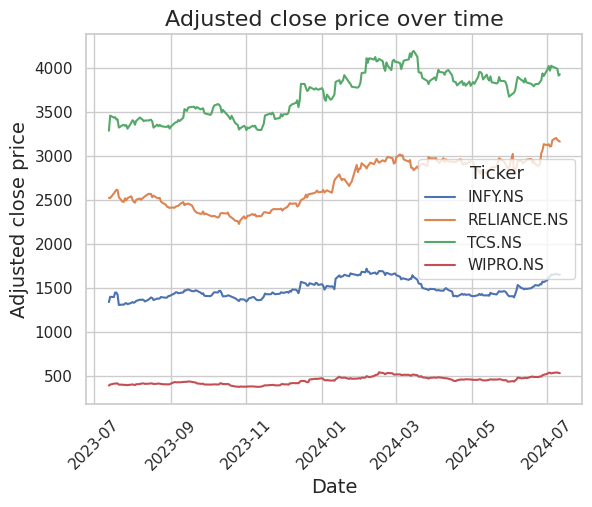

In [ ]:
sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker')
plt.title('Adjusted close price over time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted close price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.xticks(rotation=45)
plt.show();

The graph displays adjusted close prices over the last year for the four stocks. It is clear that TCS has the highest adjusted close prices followed by Reliance. Both of them show noticeable upward trend.

Infosys and Wipro shows stability in their adjusted close prices with relatively lower price fluctuations.

In [ ]:
# 50 Day and 200 Day moving average (DMA)
short_window = 50
long_window = 200

# Calculate the moving averages
stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

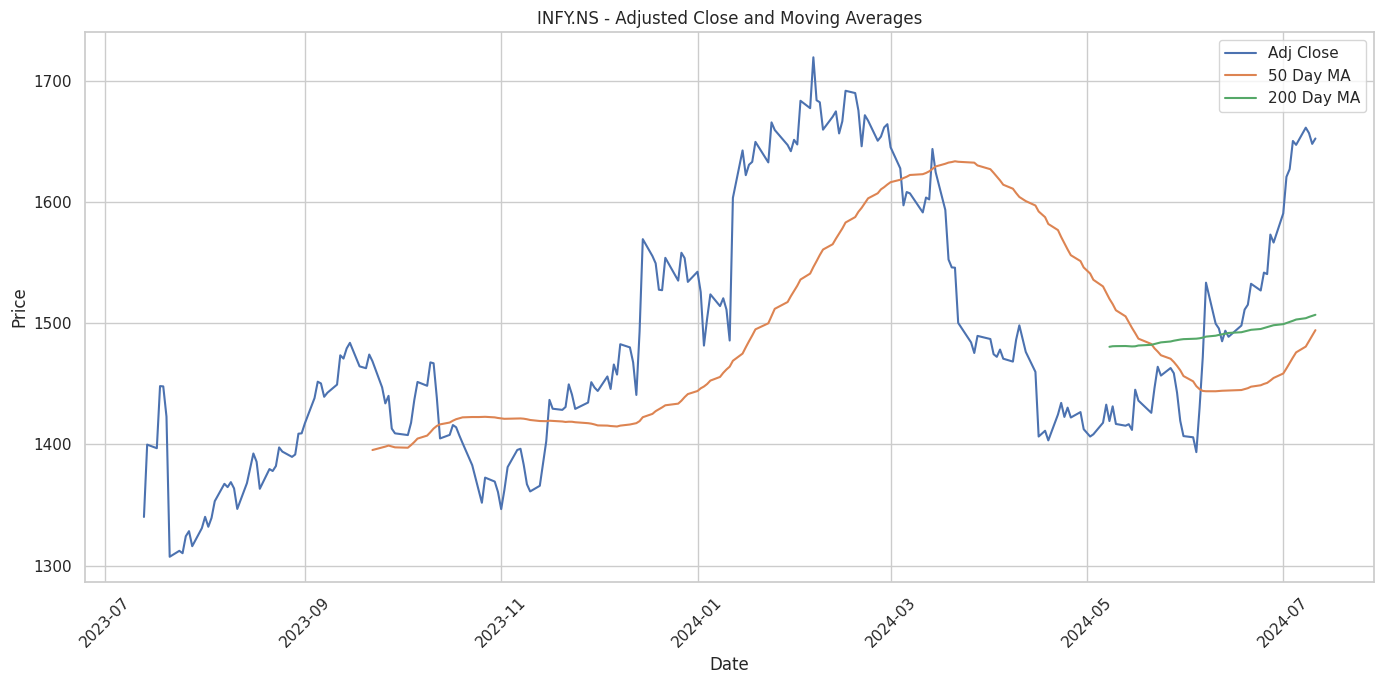

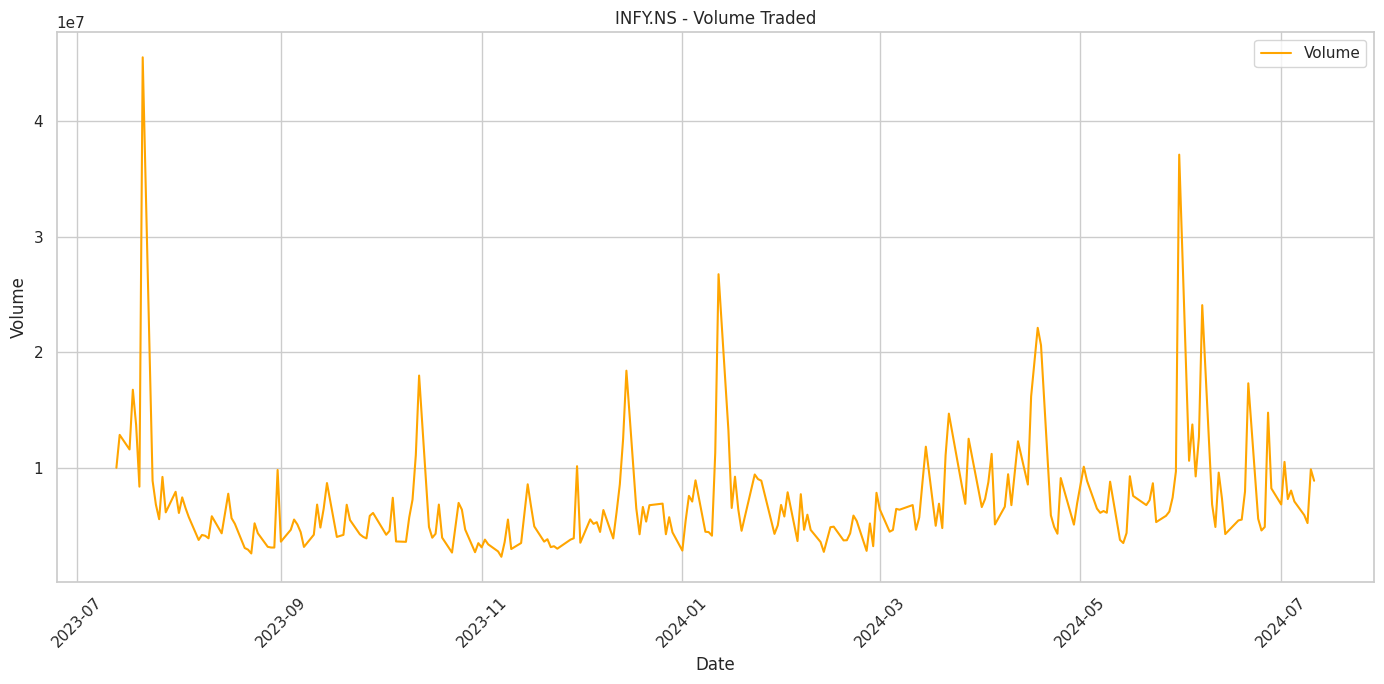

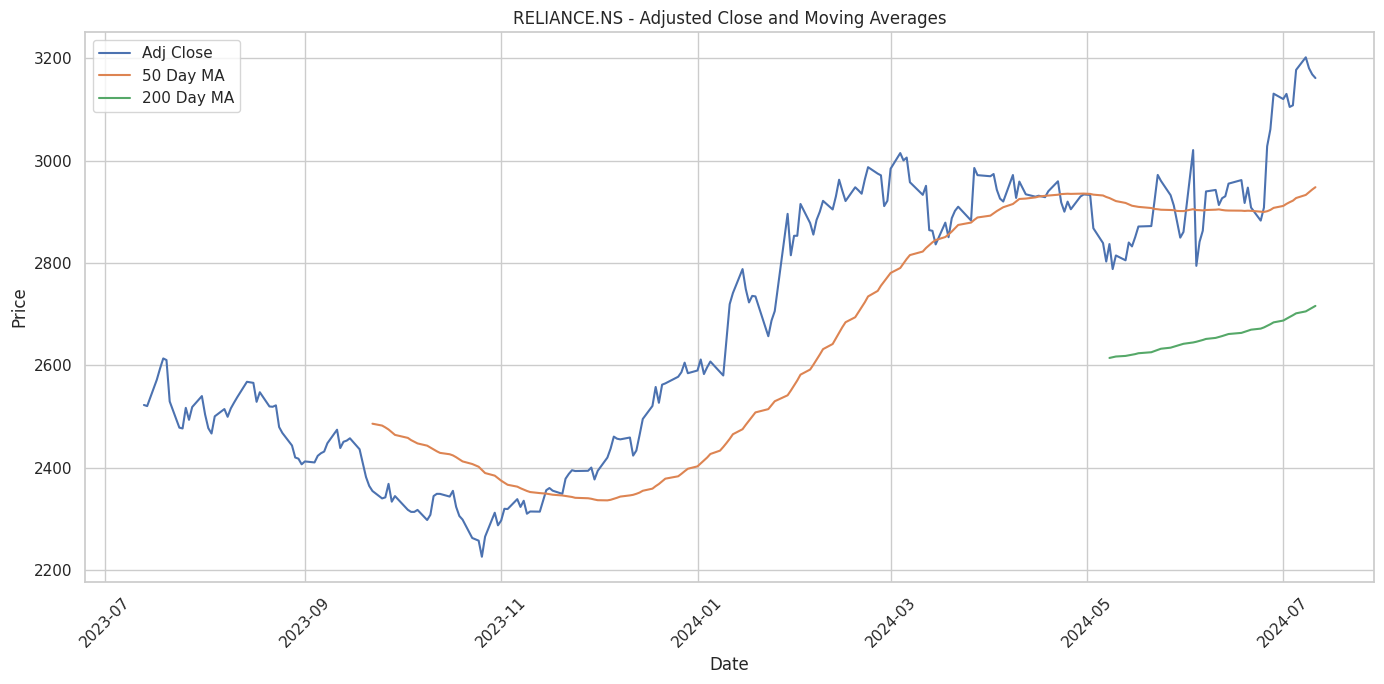

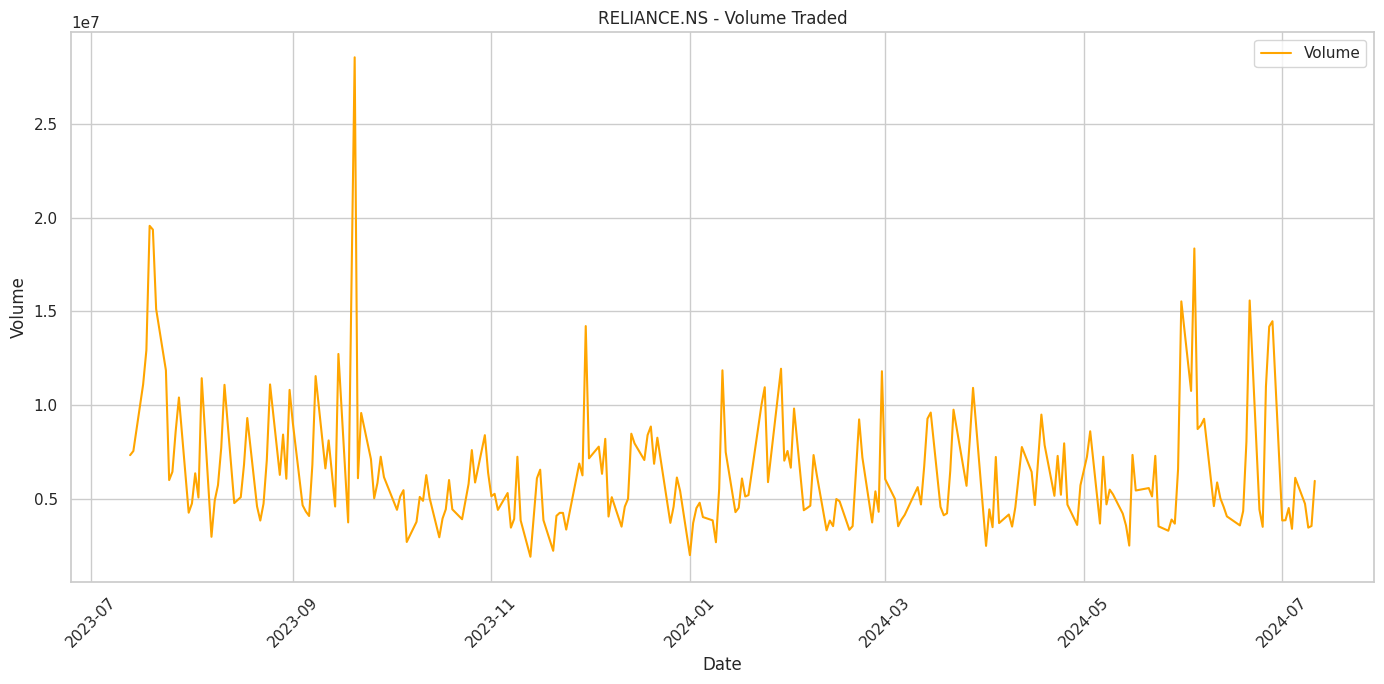

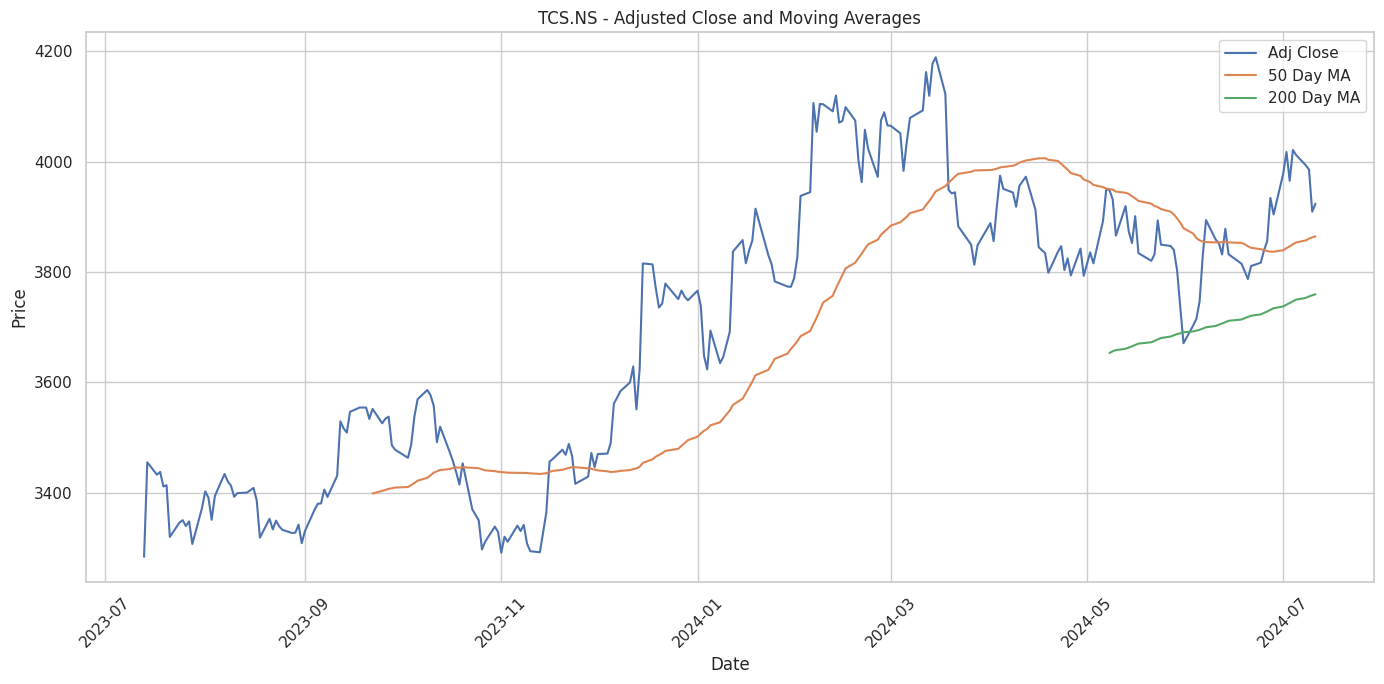

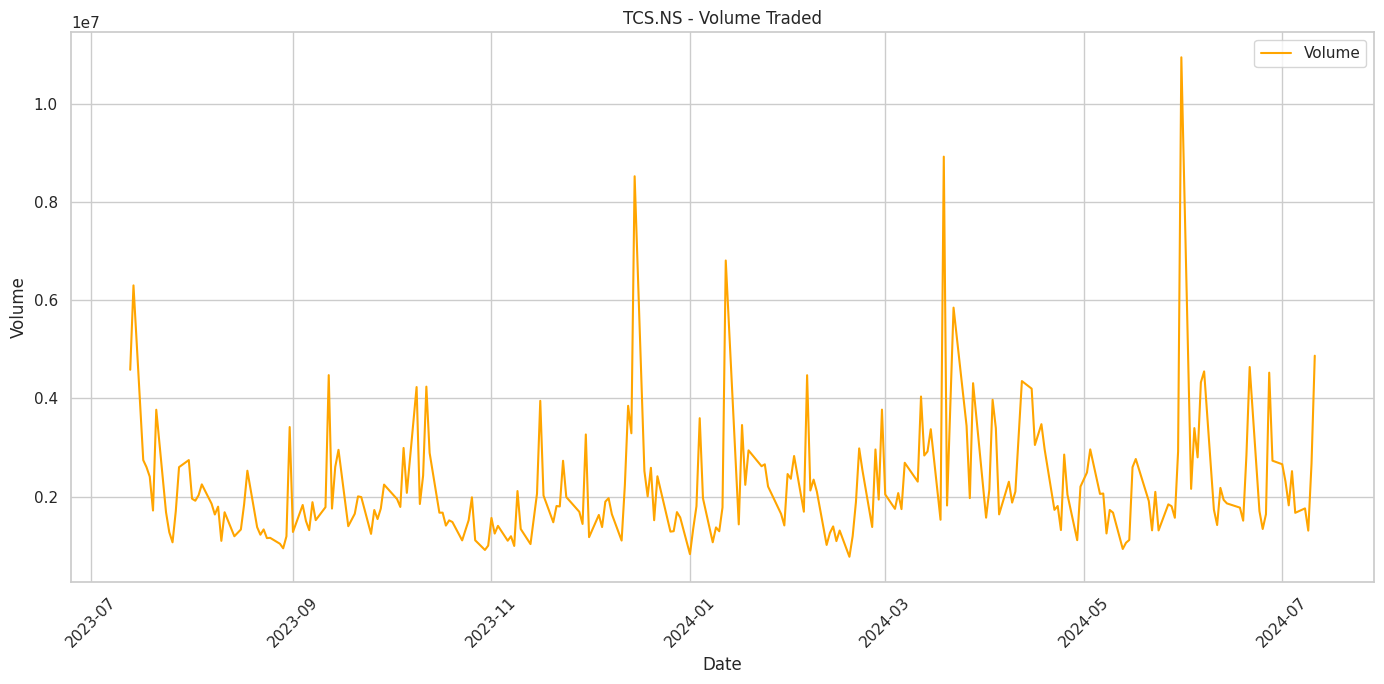

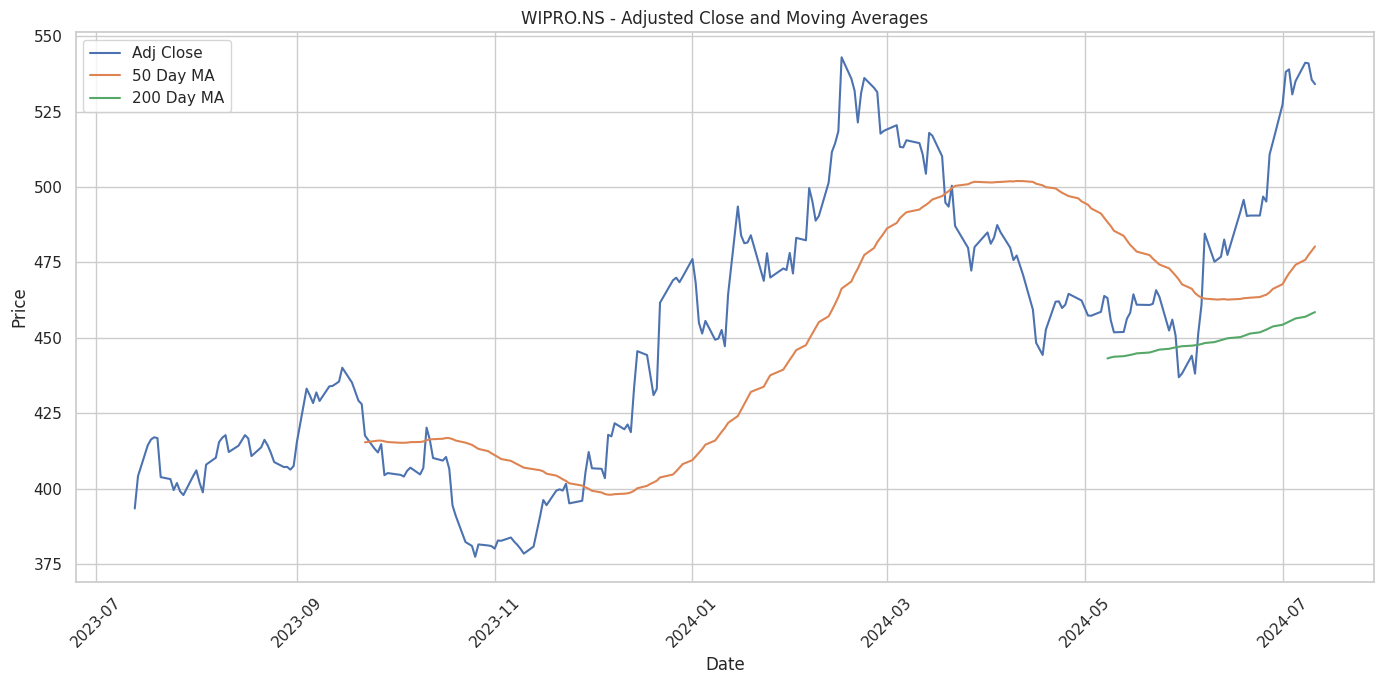

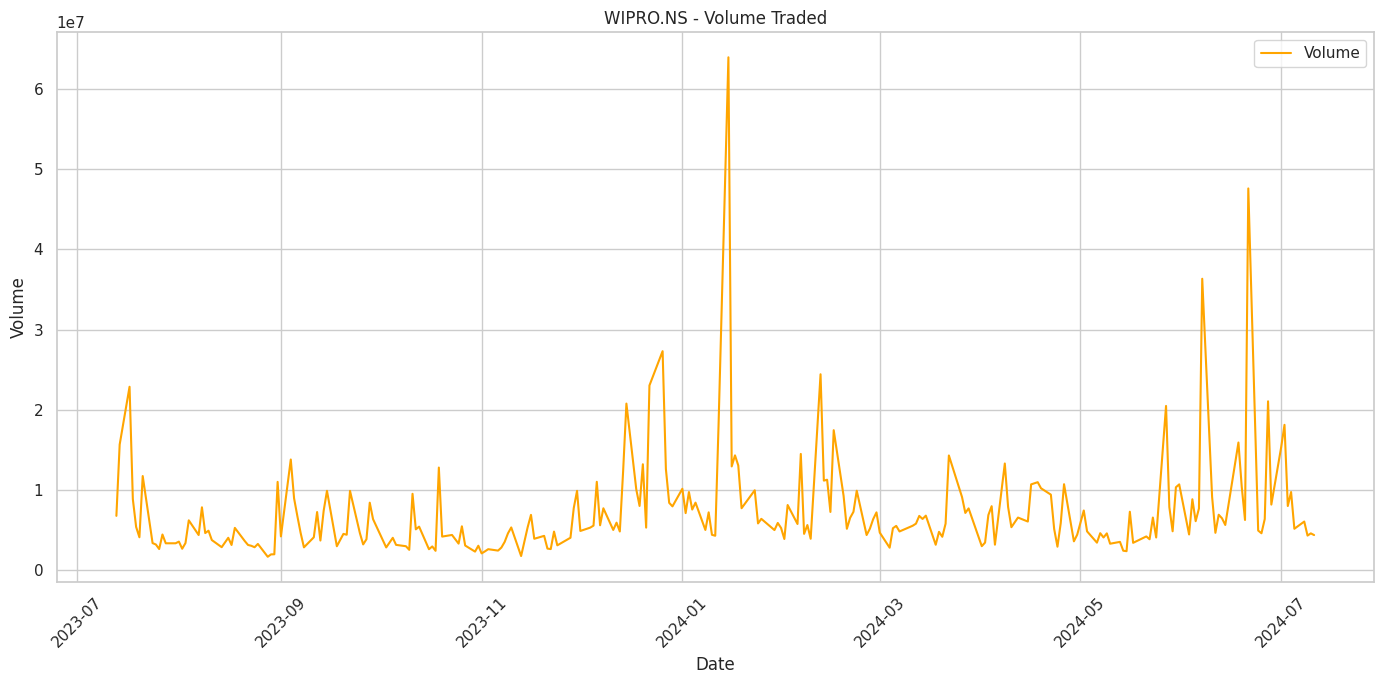

In [ ]:
for ticker in unique_tickers:
  ticker_data = stock_data[stock_data['Ticker'] == ticker]
  ticker_data['50 Day MA'] = ticker_data['Adj Close'].rolling(window=short_window).mean()
  ticker_data['200 Day MA'] = ticker_data['Adj Close'].rolling(window=long_window).mean()

  plt.figure(figsize=(14,7))
  plt.plot(ticker_data.index,ticker_data['Adj Close'],label='Adj Close')
  plt.plot(ticker_data.index,ticker_data['50 Day MA'],label='50 Day MA')
  plt.plot(ticker_data.index,ticker_data['200 Day MA'],label='200 Day MA')
  plt.title(f'{ticker} - Adjusted Close and Moving Averages')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(14,7))
  plt.plot(ticker_data.index,ticker_data['Volume'],label='Volume',color='orange')
  plt.title(f'{ticker} - Volume Traded')
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show();

Infosys has taken a massive hit in after may in their 50 DMA. It peaked initially in the first quater of the year

Reliance and Wipro gradually recovered from their past dip after the new year started.

TCS' 50 DMA peaked around the end of 2023-24 fiscal year

### 2. Distribution of daily returns

In [ ]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()
plt.figure(figsize=(14,7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

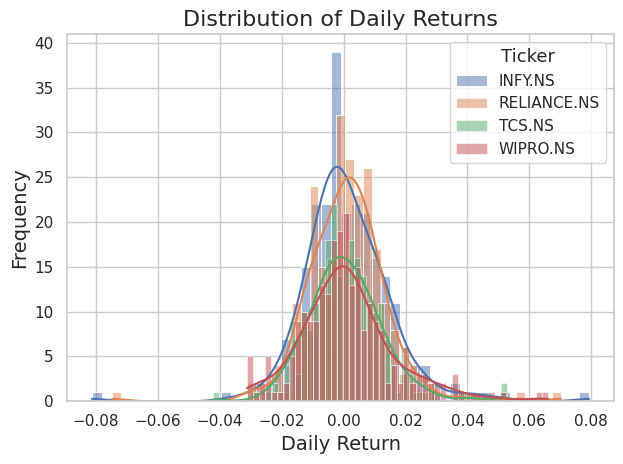

In [ ]:
for ticker in unique_tickers:
  ticker_data = stock_data[stock_data['Ticker'] == ticker]
  sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.legend(title='Ticker',title_fontsize='13',fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show();

The distributions are approximately normal centered around zero which indicates that most of the daily returns are close to the average return.

However, there are tails on both ends, which reflect occasional significant gains or losses.

Infosys and Reliance have the widest distributions suggesting higher volatility while Wipro shows their graph shifted towards higher gains

### 3. Correlation between the stocks

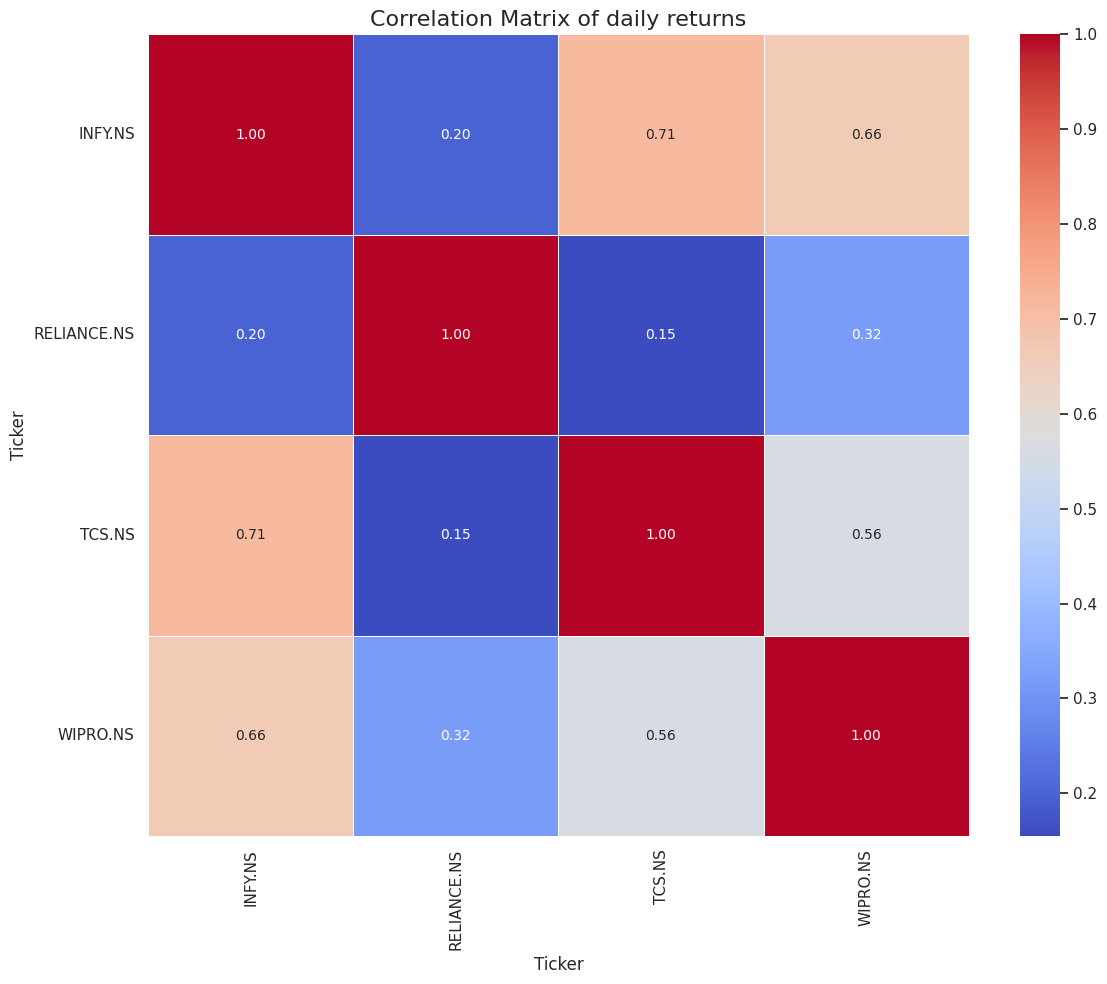

In [ ]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=.5,fmt='.2f',annot_kws={'size':10})
plt.title('Correlation Matrix of daily returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show();

TCS and Infosys show the highest positive correlation amongst all (0.71) which indicates they tend to move in the same direction.

Infosys has slightly high positive correlation with Wipro (0.66).

Reliance and Infosys (0.2) and Reliance and Wipro (0.15) has almost no correlation between them.

These varying correlations suggest potential diversifications benefits combining stocks with lower correlations can reduce overall portfolio risk.

# Portfolio Optimization



> Using **Modern Portfolio Theory**, we can construct an efficient portfolio by balancing risk and return. We will:
1. Calculate the expected returns and volatility for each stock
2. Generate a series of random portfolios to identify the efficient frontier
3. Optimize the portfolio to maximize the **Sharpe ratio**, whihc is a measure of risk-adjusted return



In [ ]:
#annualize the returns
expected_returns = daily_returns.mean() * 252

#annualize the volatility
volatility = daily_returns.std() * np.sqrt(252)

stock_stats = pd.DataFrame(
    {
        'Expected Return': expected_returns,
        'Volatility': volatility
    }
)

stock_stats

,Expected Return,Volatility
Ticker,,
INFY.NS,0.244088,0.231298
RELIANCE.NS,0.256119,0.210686
TCS.NS,0.203808,0.196985
WIPRO.NS,0.346779,0.245301


Wipro has the highest expected returns with **34.6%** while all other three companies have their expected returns close to each other with TCS having **20.3%**, Infosys having **24.4%** and Reliance having **25.6%**

In [ ]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
  portfolio_return = np.dot(weights, returns)
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
  return portfolio_return, portfolio_volatility

In [ ]:
#  number of portfolios to simulate
num_portfolios = 10000
# arrays to store the results
results = np.zeros((3, num_portfolios))
# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252


In [ ]:
np.random.seed(42)
for i in range(num_portfolios):
  weights = np.random.random(len(unique_tickers))
  weights /= np.sum(weights)
  portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
  results[0, i] = portfolio_return
  results[1, i] = portfolio_volatility
  results[2, i] = (portfolio_return) / portfolio_volatility # Sharpe Ratio.

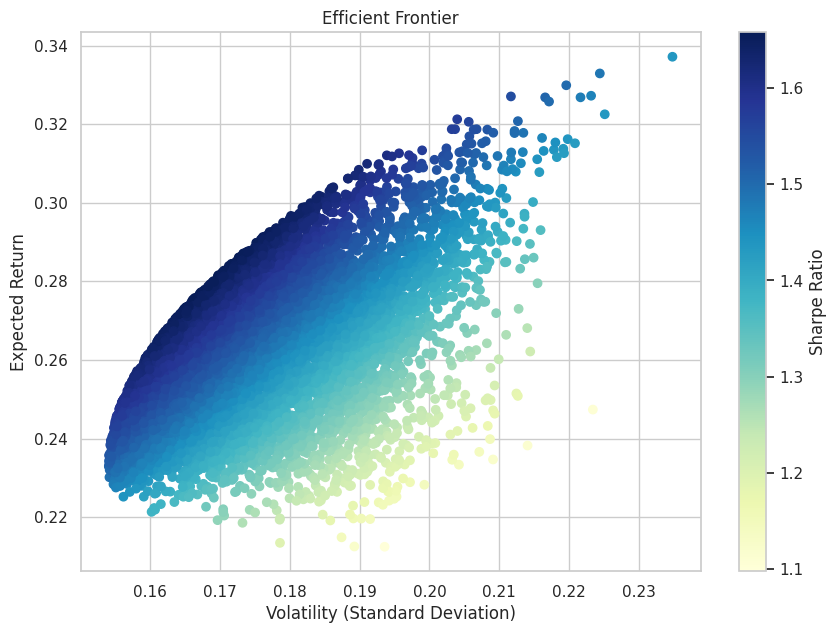

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show();

In [ ]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.28156257886747815, 0.16979986658026372, 1.658202591898885)

The portfolio with the maximum Sharpe ratio has the following characteristics:
1. Expected Return ~ **26.08%**
2. Volatility ~ **15.54%**
3. Sharpe Ratio ~ **1.68**

In [ ]:
max_shapre_weight = np.zeros(len(unique_tickers))
for i in range(num_portfolios):
  weights = np.random.random(len(unique_tickers))
  weights /= np.sum(weights)

  portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
  if results[2, i] == max_sharpe_ratio:
    max_sharpe_weight = weights
    break;

portfolio_weights_df = pd.DataFrame(
    {
        'Ticker':unique_tickers,
        'Weight':max_sharpe_weight
    }
)

portfolio_weights_df

,Ticker,Weight
0,INFY.NS,0.343746
1,RELIANCE.NS,0.070971
2,TCS.NS,0.221144
3,WIPRO.NS,0.364140


### Conclusion:
Wipro has the highest allocation of **36.41%**

Infosys has the allocation of **34.37%**

Reliance has the allocation of **7%**

TCS has the allocation of **22.11%**